## a first plot test (using new models!)

In [1]:
# import sys
# !{sys.executable} -m pip install https://bitbucket.org/yymao/helpers/get/master.zip

In [1]:
import os
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt


#......new imports (helper class)
import sys
sys.path.insert(0, '../scripts') # adding to the system path
from hlistHelper import hlist


%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
plt.rc("text", usetex=True)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'cm'
custom_wdm_colors = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
custom_fdm_colors = ["#d2b7e5","#c19ee0","#b185db","#a06cd5","#815ac0","#6247aa"]
custom_idm_colors = ["#77bba3","#467a69","#325d50"]


sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['wdm_3'] = custom_wdm_colors[0]
sim_colors['wdm_4'] = custom_wdm_colors[1]
sim_colors['wdm_5'] = custom_wdm_colors[2]
sim_colors['wdm_6'] = custom_wdm_colors[3]
sim_colors['wdm_6.5'] = custom_wdm_colors[4]
sim_colors['wdm_10'] = custom_wdm_colors[5]
sim_colors['fdm_25.9e-22eV'] = custom_fdm_colors[0]
sim_colors['fdm_69.4e-22eV'] = custom_fdm_colors[1]
sim_colors['fdm_113e-22eV'] = custom_fdm_colors[2]
sim_colors['fdm_151e-22eV'] = custom_fdm_colors[3]
sim_colors['fdm_185e-22eV'] = custom_fdm_colors[4]
sim_colors['fdm_490e-22eV'] = custom_fdm_colors[5]
sim_colors['idm_1e-4GeV_envelope'] = custom_idm_colors[0]
sim_colors['idm_1e-2GeV_envelope'] = custom_idm_colors[1]
sim_colors['idm_1GeV_envelope'] = custom_idm_colors[2]
sim_colors['idm_1e-4GeV_halfmode'] = custom_idm_colors[0]
sim_colors['idm_1e-2GeV_halfmode'] = custom_idm_colors[1]
sim_colors['idm_1GeV_halfmode'] = custom_idm_colors[2]

In [12]:
#...... cold dark matter

cdm = hlist(halo_id='Halo113', model='cdm')
cdm.load_hlists()
cdm.get_hmb()

x_cdm_0, y_cdm_0 = cdm.shmf_plottables(z=0)
x_cdm_5, y_cdm_5 = cdm.shmf_plottables(z=0.5)
x_cdm_75, y_cdm_75 = cdm.shmf_plottables(z=0.75)
x_cdm_85, y_cdm_85 = cdm.shmf_plottables(z=0.85)
x_cdm_1, y_cdm_1 = cdm.shmf_plottables(z=1.0)

val, cum, base, mass_cut  = cdm.shmf(z=0, return_masscut_idx=True)
val_5, cum_5, discard, mass_cut_5 = cdm.shmf(z=0.5, return_masscut_idx=True)
val_75, cum_75, discard, mass_cut_75 = cdm.shmf(z=0.75, return_masscut_idx=True)
val_85, cum_85, discard, mass_cut_85 = cdm.shmf(z=0.85, return_masscut_idx=True)
val_1, cum_1, discard, mass_cut_1 = cdm.shmf(z=1, return_masscut_idx=True)

halos, subhalos= cdm.get_z(0)
halos_5, subhalos_5 = cdm.get_z(z=0.5)
halos_75, subhalos_75 = cdm.get_z(z=0.75)
halos_85, subhalos_85 = cdm.get_z(z=0.85)
halos_1, subhalos_1 = cdm.get_z(z=1)

/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


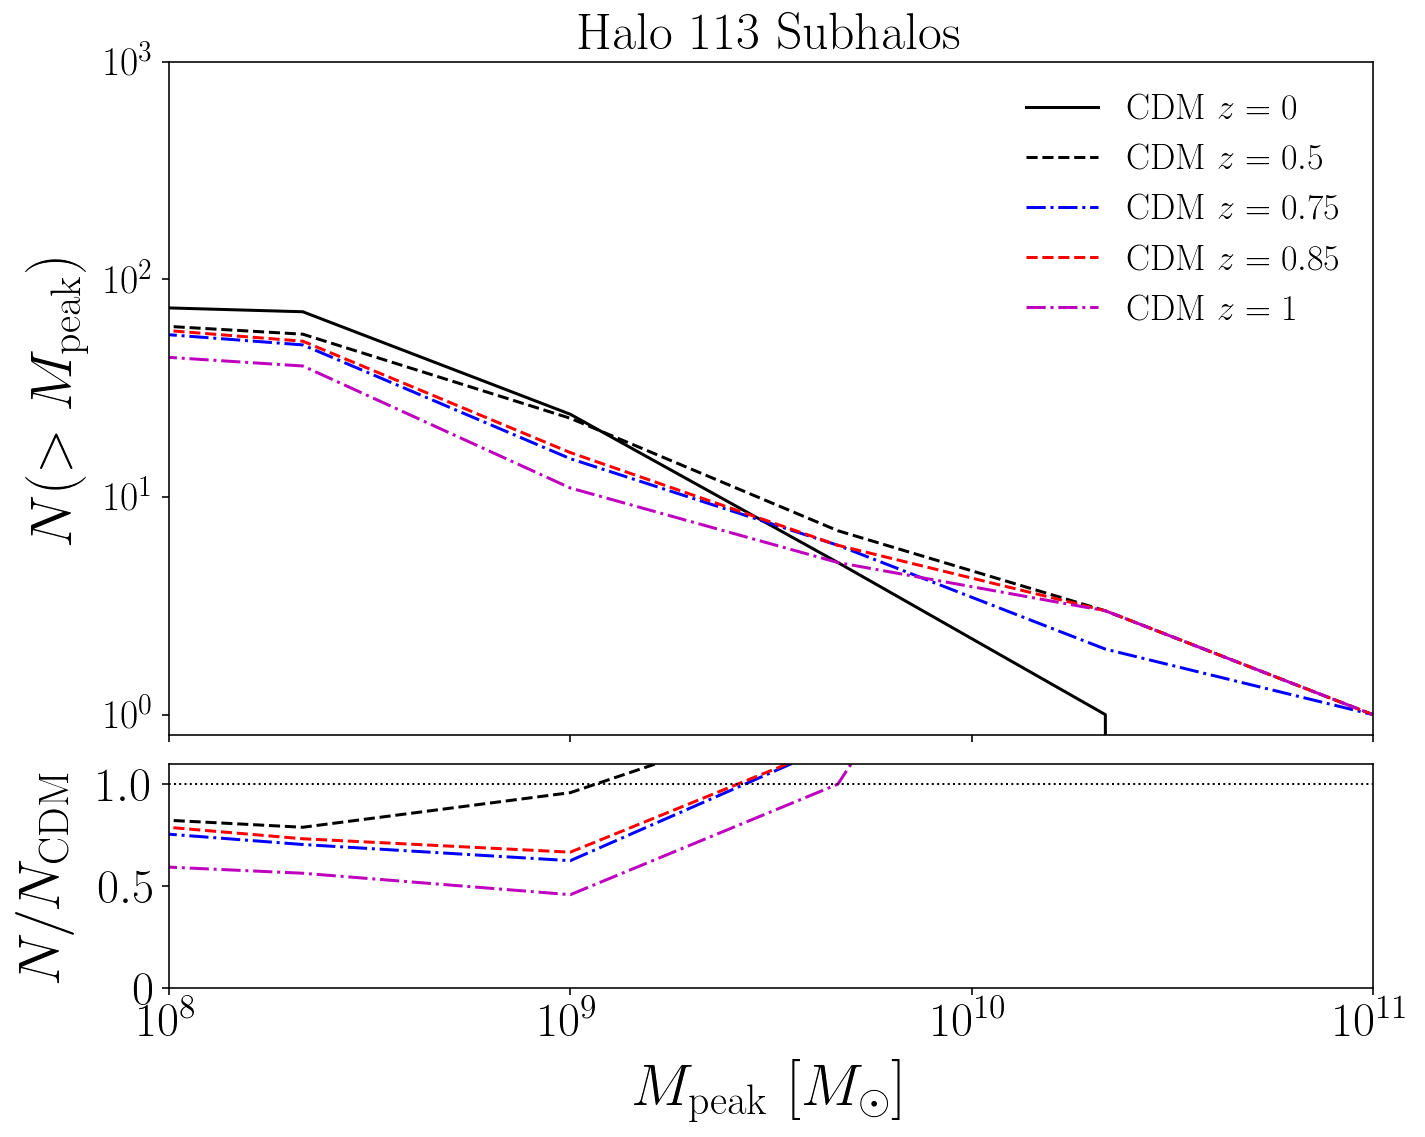

In [13]:

#......... recreating the plots from week 1 for different halos!

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

###
ax[0].plot(x_cdm_0, y_cdm_0, 'k-',label='$\mathrm{CDM}\ z=0$')
ax[0].plot(x_cdm_5, y_cdm_5, 'k--',label='$\mathrm{CDM}\ z=0.5$')
ax[0].plot(x_cdm_75, y_cdm_75, 'b-.',label='$\mathrm{CDM}\ z=0.75$')
ax[0].plot(x_cdm_85, y_cdm_85, 'r--',label='$\mathrm{CDM}\ z=0.85$')
ax[0].plot(x_cdm_1, y_cdm_1, 'm-.',label='$\mathrm{CDM}\ z=1$')

###

#The bottom panel shows the ratio relative to CDM - which is just 1 when we only show CDM, but for other models



ax[1].plot(base[1:], base[:-1]-base[:-1]+1., 'k:', lw=1, zorder=999)
ax[1].plot(base[1:], (1.*len(subhalos_5['Mpeak'][mass_cut_5])-cum_5)/(1.*len(subhalos['Mpeak'][mass_cut])-cum), 
               'k--')
ax[1].plot(base[1:], (1.*len(subhalos_75['Mpeak'][mass_cut_75])-cum_75)/(1.*len(subhalos['Mpeak'][mass_cut])-cum), 
               'b-.')
ax[1].plot(base[1:], (1.*len(subhalos_85['Mpeak'][mass_cut_85])-cum_85)/(1.*len(subhalos['Mpeak'][mass_cut])-cum), 
               'r--')
ax[1].plot(base[1:], (1.*len(subhalos_1['Mpeak'][mass_cut_1])-cum_1)/(1.*len(subhalos['Mpeak'][mass_cut])-cum), 
               'm-.')

###

ax[0].set_title(r'$\mathrm{Halo\ 113\ Subhalos}$',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,1.1)
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_yticklabels([r'$0$',r'$0.5$',r'$1.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

###

plt.tight_layout()
plt.show()

### redshift snapshots, varying particle masses (WDM only)

looking at different redshift snapshots for an array of dark matter models (only warm dark matter for now, planning to look at SIDM later on).

In [108]:
#...... parameters
halo_id = 'Halo023'
z = 0

#...... loading the models
cdm = hlist(halo_id=halo_id, model='cdm')
wdm_3 = hlist(halo_id=halo_id, model='wdm_3')
wdm_4 = hlist(halo_id=halo_id, model='wdm_4')
wdm_5 = hlist(halo_id=halo_id, model='wdm_5')
wdm_6 = hlist(halo_id=halo_id, model='wdm_6')
wdm_65 = hlist(halo_id=halo_id, model='wdm_6.5')
wdm_10 = hlist(halo_id=halo_id, model='wdm_10')

#...... intializing models, halo lists
cdm.load_hlists()
wdm_3.load_hlists()
wdm_4.load_hlists()
wdm_5.load_hlists()
wdm_6.load_hlists()
wdm_65.load_hlists()
wdm_10.load_hlists()

#...... intializing models, host main branch
cdm.load_hmb()
wdm_3.load_hmb()
wdm_4.load_hmb()
wdm_5.load_hmb()
wdm_6.load_hmb()
wdm_65.load_hmb()
wdm_10.load_hmb()

#...... plottables, cumulative

x_cdm, y_cdm = cdm.shmf_plottables(z=z)
x_wdm_3, y_wdm_3 = wdm_3.shmf_plottables(z=z)
x_wdm_4, y_wdm_4 = wdm_4.shmf_plottables(z=z)
x_wdm_5, y_wdm_5 = wdm_5.shmf_plottables(z=z)
x_wdm_6, y_wdm_6 = wdm_6.shmf_plottables(z=z)
x_wdm_65, y_wdm_65 = wdm_65.shmf_plottables(z=z)
x_wdm_10, y_wdm_10 = wdm_10.shmf_plottables(z=z)

#...... plottables, relative number

val_cdm, cum_cdm, base_cdm, mass_cut_cdm  = cdm.shmf(z=z, return_masscut_idx=True)
val_wdm_3, cum_wdm_3, discard, mass_cut_wdm_3  = wdm_3.shmf(z=z, return_masscut_idx=True)
val_wdm_4, cum_wdm_4, discard, mass_cut_wdm_4  = wdm_4.shmf(z=z, return_masscut_idx=True)
val_wdm_5, cum_wdm_5, discard, mass_cut_wdm_5  = wdm_5.shmf(z=z, return_masscut_idx=True)
val_wdm_6, cum_wdm_6, discard, mass_cut_wdm_6  = wdm_6.shmf(z=z, return_masscut_idx=True)
val_wdm_65, cum_wdm_65, discard, mass_cut_wdm_65  = wdm_65.shmf(z=z, return_masscut_idx=True)
val_wdm_10, cum_wdm_10, discard, mass_cut_wdm_10  = wdm_10.shmf(z=z, return_masscut_idx=True)

halos_cdm, subhalos_cdm = cdm.get_z(z)
halos_wdm_3, subhalos_wdm_3 = wdm_3.get_z(z)
halos_wdm_4, subhalos_wdm_4 = wdm_4.get_z(z)
halos_wdm_5, subhalos_wdm_5 = wdm_5.get_z(z)
halos_wdm_6, subhalos_wdm_6 = wdm_6.get_z(z)
halos_wdm_65, subhalos_wdm_65 = wdm_65.get_z(z)
halos_wdm_10, subhalos_wdm_10 = wdm_10.get_z(z)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


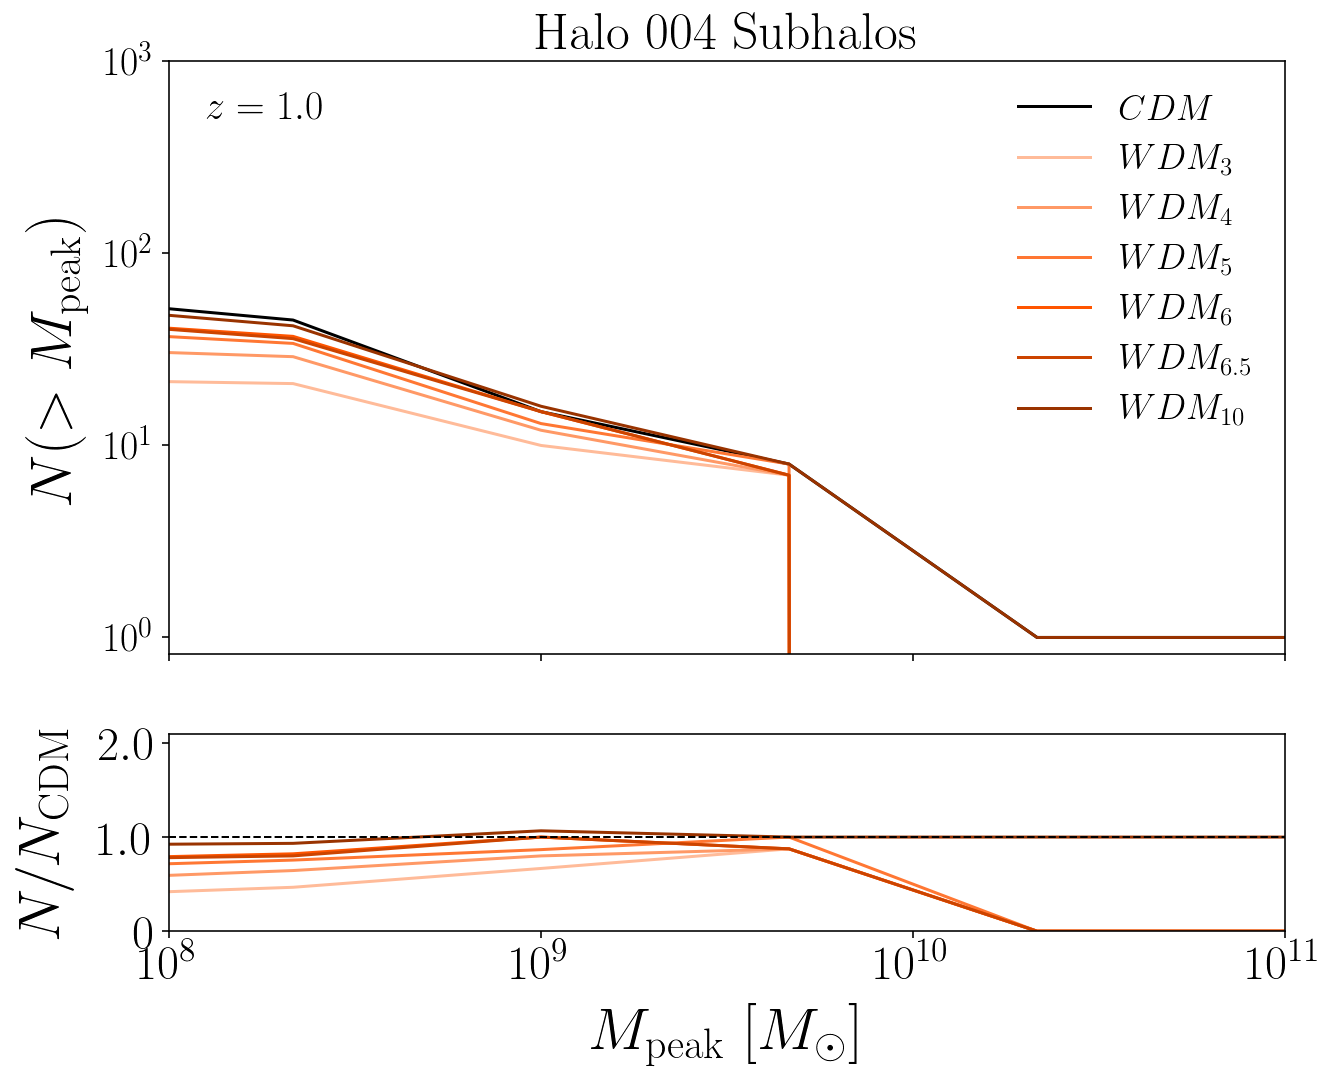

In [99]:

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

#....... 

ax[0].plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$')
ax[0].plot(x_wdm_3, y_wdm_3, c=sim_colors['wdm_3'],label=r'$WDM_3$')
ax[0].plot(x_wdm_4, y_wdm_4, c=sim_colors['wdm_4'],label=r'$WDM_4$')
ax[0].plot(x_wdm_5, y_wdm_5, c=sim_colors['wdm_5'],label=r'$WDM_5$')
ax[0].plot(x_wdm_6, y_wdm_6, c=sim_colors['wdm_6'],label=r'$WDM_6$')
ax[0].plot(x_wdm_65, y_wdm_65, c=sim_colors['wdm_6.5'],label=r'$WDM_{6.5}$')
ax[0].plot(x_wdm_10, y_wdm_10, c=sim_colors['wdm_10'],label=r'$WDM_{10}$')

ax[1].plot(base_cdm[1:], base_cdm[:-1]-base_cdm[:-1]+1., 'k--', lw=1, zorder=999)
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_3['Mpeak'][mass_cut_wdm_3])-cum_wdm_3)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_3'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_4['Mpeak'][mass_cut_wdm_4])-cum_wdm_4)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_4'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_5['Mpeak'][mass_cut_wdm_5])-cum_wdm_5)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_5'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_6['Mpeak'][mass_cut_wdm_6])-cum_wdm_6)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_6'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_65['Mpeak'][mass_cut_wdm_65])-cum_wdm_65)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_6.5'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_10['Mpeak'][mass_cut_wdm_10])-cum_wdm_10)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_10'])


#.......

ax[0].set_title(f'Halo {halo_id[-3:]} Subhalos',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[0].text(8.1,500, rf'$z={z}$', fontsize=20)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,2.1)
ax[1].set_yticks([0,1.0,2.0])
ax[1].set_yticklabels([r'$0$',r'$1.0$',r'$2.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

### updating these with error contours (?)

In [109]:
cdm_upper_err = y_cdm + (1./np.sqrt(np.mean(cum_cdm, axis=0)) * y_cdm)
cdm_lower_err = y_cdm - (1./np.sqrt(np.mean(cum_cdm, axis=0)) * y_cdm)

/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no a

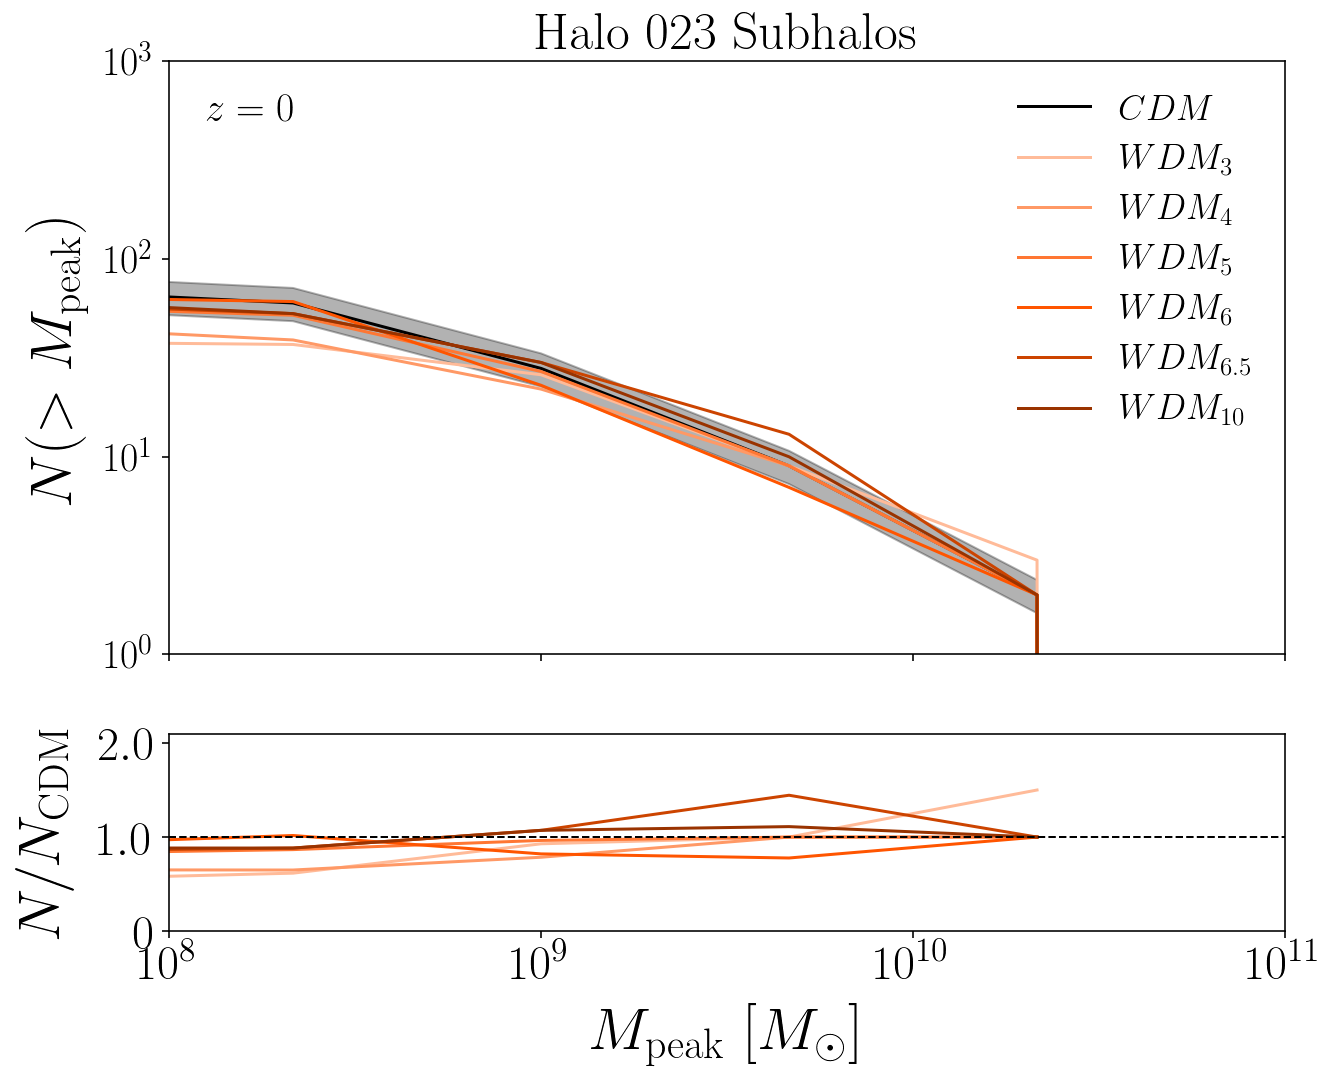

In [114]:

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

#....... 

ax[0].plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$')
ax[0].plot(x_wdm_3, y_wdm_3, c=sim_colors['wdm_3'],label=r'$WDM_3$')
ax[0].plot(x_wdm_4, y_wdm_4, c=sim_colors['wdm_4'],label=r'$WDM_4$')
ax[0].plot(x_wdm_5, y_wdm_5, c=sim_colors['wdm_5'],label=r'$WDM_5$')
ax[0].plot(x_wdm_6, y_wdm_6, c=sim_colors['wdm_6'],label=r'$WDM_6$')
ax[0].plot(x_wdm_65, y_wdm_65, c=sim_colors['wdm_6.5'],label=r'$WDM_{6.5}$')
ax[0].plot(x_wdm_10, y_wdm_10, c=sim_colors['wdm_10'],label=r'$WDM_{10}$')

ax[0].fill_between(x_cdm, cdm_upper_err, cdm_lower_err, color=sim_colors['cdm'], alpha = 0.3)
# ax[0].fill_between(x_wdm_3, wdm3_upper_err, wdm3_lower_err, color=sim_colors['wdm_3'], alpha = 0.3)
# ax[0].fill_between(x_wdm_5, wdm5_upper_err, wdm5_lower_err, color=sim_colors['wdm_5'], alpha = 0.3)

# ax[0].errorbar(x_cdm,y_cdm,yerr=(1./np.sqrt(np.mean(cum_cdm, axis=0)) * y_cdm),
#              linestyle='none',marker='.',markersize=10,capsize=3,color=sim_colors['cdm'])
# ax[0].errorbar(x_wdm_10,y_wdm_10,yerr=(1./np.sqrt(np.mean(cum_wdm_10, axis=0)) * y_wdm_10),
#              linestyle='none',marker='.',markersize=10,capsize=3,color=sim_colors['wdm_10'])


ax[1].plot(base_cdm[1:], base_cdm[:-1]-base_cdm[:-1]+1., 'k--', lw=1, zorder=999)
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_3['Mpeak'][mass_cut_wdm_3])-cum_wdm_3)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_3'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_4['Mpeak'][mass_cut_wdm_4])-cum_wdm_4)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_4'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_5['Mpeak'][mass_cut_wdm_5])-cum_wdm_5)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_5'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_6['Mpeak'][mass_cut_wdm_6])-cum_wdm_6)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_6'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_65['Mpeak'][mass_cut_wdm_65])-cum_wdm_65)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_6.5'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_wdm_10['Mpeak'][mass_cut_wdm_10])-cum_wdm_10)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['wdm_10'])


#.......

ax[0].set_title(f'Halo {halo_id[-3:]} Subhalos',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[0].text(8.1,500, rf'$z={z}$', fontsize=20)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,2.1)
ax[1].set_yticks([0,1.0,2.0])
ax[1].set_yticklabels([r'$0$',r'$1.0$',r'$2.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

### adding FDM and IDM plots as well!

(note that Halo 004 is the only one that has all realizations of each model, 023 and 113 have reduced data for FDM only.)

In [15]:
#...... parameters
halo_id = 'Halo113'
z = 0

#...... loading the models
cdm = hlist(halo_id=halo_id, model='cdm')
fdm_25 = hlist(halo_id=halo_id, model='fdm_25.9e-22eV')
fdm_69 = hlist(halo_id=halo_id, model='fdm_69.4e-22eV')
fdm_113 = hlist(halo_id=halo_id, model='fdm_113e-22eV')
fdm_151 = hlist(halo_id=halo_id, model='fdm_151e-22eV')
fdm_185 = hlist(halo_id=halo_id, model='fdm_185e-22eV')
fdm_490 = hlist(halo_id=halo_id, model='fdm_490e-22eV')

#...... intializing models, halo lists
cdm.load_hlists()
fdm_25.load_hlists()
fdm_69.load_hlists()
fdm_113.load_hlists()
fdm_151.load_hlists()
fdm_185.load_hlists()
fdm_490.load_hlists()

#...... intializing models, host main branch
cdm.load_hmb()
fdm_25.load_hmb()
fdm_69.load_hmb()
fdm_113.load_hmb()
fdm_151.load_hmb()
fdm_185.load_hmb()
fdm_490.load_hmb()

#...... plottables, cumulative

x_cdm, y_cdm = cdm.shmf_plottables(z=z)
x_fdm_25, y_fdm_25 = fdm_25.shmf_plottables(z=z)
x_fdm_69, y_fdm_69 = fdm_69.shmf_plottables(z=z)
x_fdm_113, y_fdm_113 = fdm_113.shmf_plottables(z=z)
x_fdm_151, y_fdm_151 = fdm_151.shmf_plottables(z=z)
x_fdm_185, y_fdm_185 = fdm_185.shmf_plottables(z=z)
x_fdm_490, y_fdm_490 = fdm_490.shmf_plottables(z=z)

#...... plottables, relative number

val_cdm, cum_cdm, base_cdm, mass_cut_cdm  = cdm.shmf(z=z, return_masscut_idx=True)
val_fdm_25, cum_fdm_25, discard, mass_cut_fdm_25  = fdm_25.shmf(z=z, return_masscut_idx=True)
val_fdm_69, cum_fdm_69, discard, mass_cut_fdm_69  = fdm_69.shmf(z=z, return_masscut_idx=True)
val_fdm_113, cum_fdm_113, discard, mass_cut_fdm_113  = fdm_113.shmf(z=z, return_masscut_idx=True)
val_fdm_151, cum_fdm_151, discard, mass_cut_fdm_151  = fdm_151.shmf(z=z, return_masscut_idx=True)
val_fdm_185, cum_fdm_185, discard, mass_cut_fdm_185  = fdm_185.shmf(z=z, return_masscut_idx=True)
val_fdm_490, cum_fdm_490, discard, mass_cut_fdm_490  = fdm_490.shmf(z=z, return_masscut_idx=True)

halos_cdm, subhalos_cdm = cdm.get_z(z)
halos_fdm_25, subhalos_fdm_25 = fdm_25.get_z(z)
halos_fdm_69, subhalos_fdm_69 = fdm_69.get_z(z)
halos_fdm_113, subhalos_fdm_113 = fdm_113.get_z(z)
halos_fdm_151, subhalos_fdm_151 = fdm_151.get_z(z)
halos_fdm_185, subhalos_fdm_185 = fdm_185.get_z(z)
halos_fdm_490, subhalos_fdm_490 = fdm_490.get_z(z)

/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/central/software/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no a

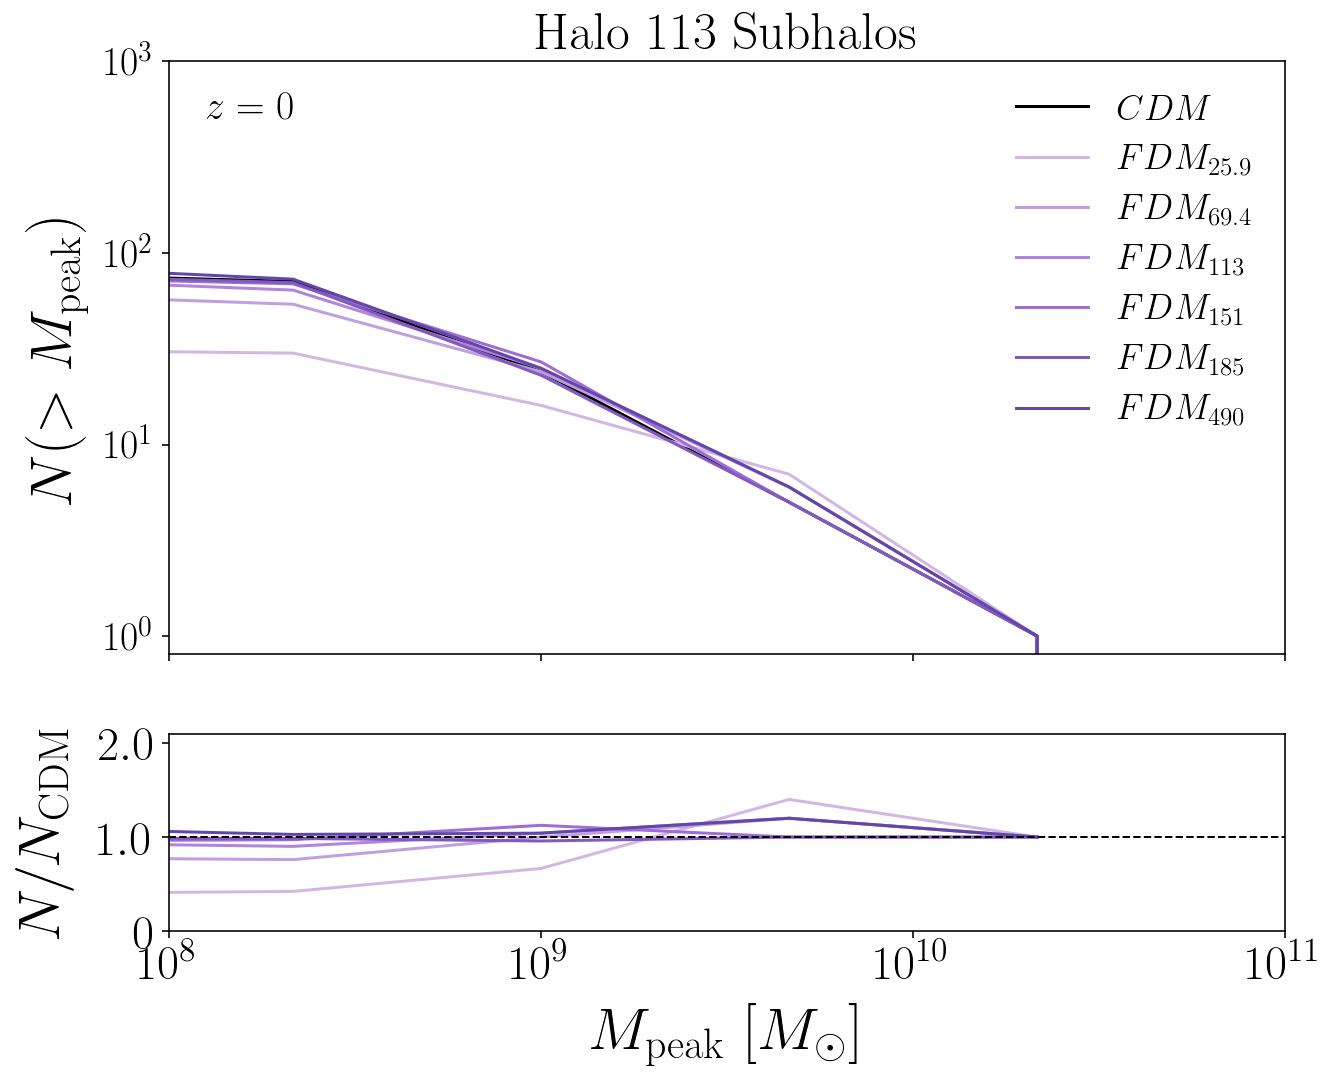

In [16]:

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

#....... 

ax[0].plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$')
ax[0].plot(x_fdm_25, y_fdm_25, c=sim_colors['fdm_25.9e-22eV'],label=r'$FDM_{25.9}$')
ax[0].plot(x_fdm_69, y_fdm_69, c=sim_colors['fdm_69.4e-22eV'],label=r'$FDM_{69.4}$')
ax[0].plot(x_fdm_113, y_fdm_113, c=sim_colors['fdm_113e-22eV'],label=r'$FDM_{113}$')
ax[0].plot(x_fdm_151, y_fdm_151, c=sim_colors['fdm_151e-22eV'],label=r'$FDM_{151}$')
ax[0].plot(x_fdm_185, y_fdm_185, c=sim_colors['fdm_185e-22eV'],label=r'$FDM_{185}$')
ax[0].plot(x_fdm_490, y_fdm_490, c=sim_colors['fdm_490e-22eV'],label=r'$FDM_{490}$')


ax[1].plot(base_cdm[1:], base_cdm[:-1]-base_cdm[:-1]+1., 'k--', lw=1, zorder=999)
ax[1].plot(base_cdm[1:], (1.*len(subhalos_fdm_25['Mpeak'][mass_cut_fdm_25])-cum_fdm_25)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_25.9e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_fdm_69['Mpeak'][mass_cut_fdm_69])-cum_fdm_69)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_69.4e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_fdm_113['Mpeak'][mass_cut_fdm_113])-cum_fdm_113)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_113e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_fdm_151['Mpeak'][mass_cut_fdm_151])-cum_fdm_151)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_151e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_fdm_185['Mpeak'][mass_cut_fdm_185])-cum_fdm_185)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_185e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_fdm_490['Mpeak'][mass_cut_fdm_490])-cum_fdm_490)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_490e-22eV'])


#.......

ax[0].set_title(f'Halo {halo_id[-3:]} Subhalos',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[0].text(8.1,500, rf'$z={z}$', fontsize=20)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,2.1)
ax[1].set_yticks([0,1.0,2.0])
ax[1].set_yticklabels([r'$0$',r'$1.0$',r'$2.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()

#### NOTE: need to find the compressed host main branch data for IDM models (not in usual directory)

In [ ]:
#...... parameters
halo_id = 'Halo004'
z = 0

#...... loading the models
cdm = hlist(halo_id=halo_id, model='cdm')
idm_4_env = hlist(halo_id=halo_id, model='idm_1e-4GeV_envelope')
idm_2_env = hlist(halo_id=halo_id, model='idm_1e-2GeV_envelope')
idm_1_env = hlist(halo_id=halo_id, model='idm_1GeV_envelope')
idm_4_half = hlist(halo_id=halo_id, model='idm_1e-4GeV_halfmode')
idm_2_half = hlist(halo_id=halo_id, model='idm_1e-2GeV_halfmode')
idm_1_half = hlist(halo_id=halo_id, model='idm_1GeV_halfmode')

#...... intializing models, halo lists
cdm.load_hlists()
idm_4_env.load_hlists()
idm_2_env.load_hlists()
idm_1_env.load_hlists()
idm_4_half.load_hlists()
idm_2_half.load_hlists()
idm_1_half.load_hlists()

#...... intializing models, host main branch
cdm.load_hmb()
idm_4_env.load_hmb()
idm_2_env.load_hmb()
idm_1_env.load_hmb()
idm_4_half.load_hmb()
idm_2_half.load_hmb()
idm_1_half.load_hmb()


#...... plottables, cumulative

x_cdm, y_cdm = cdm.shmf_plottables(z=z)
x_idm_4_env, y_idm_4_env = idm_4_env.shmf_plottables(z=z)
x_idm_2_env, y_idm_2_env = idm_2_env.shmf_plottables(z=z)
x_idm_1_env, y_idm_1_env = idm_1_env.shmf_plottables(z=z)
x_idm_4_half, y_idm_4_half = idm_4_half.shmf_plottables(z=z)
x_idm_2_half, y_idm_2_half = idm_2_half.shmf_plottables(z=z)
x_idm_1_half, y_idm_1_half = idm_1_half.shmf_plottables(z=z)


#...... plottables, relative number

val_cdm, cum_cdm, base_cdm, mass_cut_cdm  = cdm.shmf(z=z, return_masscut_idx=True)
val_idm_4_env, cum_idm_4_env, discard, mass_cut_idm_4_env  = idm_4_env.shmf(z=z, return_masscut_idx=True)
val_idm_2_env, cum_idm_2_env, discard, mass_cut_idm_2_env  = idm_2_env.shmf(z=z, return_masscut_idx=True)
val_idm_1_env, cum_idm_1_env, discard, mass_cut_idm_1_env  = idm_1_env.shmf(z=z, return_masscut_idx=True)
val_idm_4_half, cum_idm_4_half, discard, mass_cut_idm_4_half  = idm_4_half.shmf(z=z, return_masscut_idx=True)
val_idm_2_half, cum_idm_2_half, discard, mass_cut_idm_2_half  = idm_2_half.shmf(z=z, return_masscut_idx=True)
val_idm_1_half, cum_idm_1_half, discard, mass_cut_idm_1_half  = idm_1_half.shmf(z=z, return_masscut_idx=True)


halos_cdm, subhalos_cdm = cdm.get_z(z)
halos_idm_4_env, subhalos_idm_4_env = idm_4_env.get_z(z)
halos_idm_2_env, subhalos_idm_2_env = idm_2_env.get_z(z)
halos_idm_1_env, subhalos_idm_1_env = idm_1_env.get_z(z)
halos_idm_4_half, subhalos_idm_4_half = idm_4_half.get_z(z)
halos_idm_2_half, subhalos_idm_2_half = idm_2_half.get_z(z)
halos_idm_1_half, subhalos_idm_1_half = idm_1_half.get_z(z)


In [ ]:

f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,8), gridspec_kw={'height_ratios':[3, 1]})
bins = np.linspace(5,11,10)

#....... 

ax[0].plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$')
ax[0].plot(x_idm_4_env, y_idm_4_env, c=sim_colors['fdm_25.9e-22eV'],label=r'$IDM_{-4}$, env.')
ax[0].plot(x_idm_2_env, y_idm_2_env, c=sim_colors['fdm_69.4e-22eV'],label=r'$IDM_{-2}$, env.')
ax[0].plot(x_idm_1_env, y_idm_1_env, c=sim_colors['fdm_113e-22eV'],label=r'$IDM_{1}$, env.')
ax[0].plot(x_idm_4_half, y_idm_4_half, c=sim_colors['fdm_151e-22eV'],label=r'$IDM_{-4}$, half', linestyle=':')
ax[0].plot(x_idm_2_half, y_idm_2_half, c=sim_colors['fdm_185e-22eV'],label=r'$IDM_{-2}$, half', linestyle=':')
ax[0].plot(x_idm_1_half, y_idm_1_half, c=sim_colors['fdm_490e-22eV'],label=r'$IDM_{1}$, half', linestyle=':')


ax[1].plot(base_cdm[1:], base_cdm[:-1]-base_cdm[:-1]+1., 'k--', lw=1, zorder=999)
ax[1].plot(base_cdm[1:], (1.*len(subhalos_idm_4_env['Mpeak'][mass_cut_idm_4_env])-cum_idm_4_env)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['idm_4_env.9e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_idm_2_env['Mpeak'][mass_cut_idm_2_env])-cum_idm_2_env)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_69.4e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_idm_1_env['Mpeak'][mass_cut_idm_1_env])-cum_idm_1_env)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['idm_1_enve-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_idm_4_half['Mpeak'][mass_cut_idm_4_half])-cum_idm_4_half)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_151e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_idm_2_half['Mpeak'][mass_cut_idm_2_half])-cum_idm_2_half)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_185e-22eV'])
ax[1].plot(base_cdm[1:], (1.*len(subhalos_idm_1_half['Mpeak'][mass_cut_idm_1_half])-cum_idm_1_half)/(1.*len(subhalos_cdm['Mpeak'][mass_cut_cdm])-cum_cdm), 
                c=sim_colors['fdm_490e-22eV'])


#.......

ax[0].set_title(f'Halo {halo_id[-3:]} Subhalos',fontsize=26)
ax[0].set_yscale('log')
ax[0].set_yticks([1,10,100,1000])
ax[0].set_yticklabels([r'$10^0$',r'$10^1$',r'$10^2$',r'$10^3$'], fontsize=20)
ax[0].legend(loc=1, ncol=1, prop={'size':18}, frameon=False)
ax[0].set_ylabel(r'$N(>M_{\rm{peak}})$',fontsize=30,labelpad=8)
ax[0].minorticks_off()
ax[0].set_xlim(8,11)
ax[0].text(8.1,500, rf'$z={z}$', fontsize=20)

ax[1].set_xticks([8,9,10,11])
ax[1].set_xticklabels([r'$10^8$',r'$10^9$',r'$10^{10}$',r'$10^{11}$'], fontsize=24)
ax[1].set_ylim(0,2.1)
ax[1].set_yticks([0,1.0,2.0])
ax[1].set_yticklabels([r'$0$',r'$1.0$',r'$2.0$'], fontsize=24)
ax[1].set_xlabel(r'$M_{\rm{peak}}\ [M_{\mathrm{\odot}}]$',fontsize=30,labelpad=8)
ax[1].set_ylabel(r'$N/N_{\rm{CDM}}$', fontsize=30, labelpad=12)
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].legend(loc=4,fontsize=16, frameon=False)
ax[1].minorticks_off()